In [19]:
import matplotlib.pyplot as plt
import numpy as np
import mne
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from mne.decoding import CSP

# Set parameters
tmin, tmax = -0.5, 0.5  # Start and end of the epoch in seconds
event_id = dict(left_hand=10, right_hand=11)  # Event IDs for left and right hand motor imagery

# Load data
subject = 'B0101T'  # Example subject
gdf_file_path = f'../dataset/{subject}.gdf'  # Adjust the path to your dataset
raw = mne.io.read_raw_gdf(gdf_file_path, preload=True)

# Rename EEG channels
eeg_channel_mapping = {'EEG:C3': 'C3', 'EEG:Cz': 'Cz', 'EEG:C4': 'C4'}
raw.rename_channels(eeg_channel_mapping)

# Set channel types for EOG
raw.set_channel_types({'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'})

# Set montage
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

# Apply band-pass filter
raw.filter(8, 12, fir_design='firwin')

# Find events and create epochs
events, event_id = mne.events_from_annotations(raw)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')
epochs = mne.Epochs(raw, events, event_id, tmin=-1.0, tmax=4.0, proj=True, picks=picks, baseline=None, preload=True, event_repeated="drop")
epochs_train = epochs.copy().crop(tmin=-0.5, tmax=0.5)
labels = epochs.events[:, -1]

Extracting EDF parameters from /Users/superjordi/repos/uoc/TFG/BCI-Competition-IV-Experiments-data-set-B/dataset/B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


/var/folders/lt/rksts1mn7p7f78615mlf9g7h0000gn/T/ipykernel_22714/2999249047.py:16: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(gdf_file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.652 s)

Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
253 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 253 events and 1251 original time points ...
1 bad epochs dropped


Computing rank from data with rank=None
    Using tolerance 2e-08 (2.2e-16 eps * 3 dim * 3e+07  max singular value)
    Estimated rank (mag): 3


    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-08 (2.2e-16 eps * 3 dim * 2.4e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-08 (2.2e-16 eps * 3 dim * 7.3e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.4e-08 (2.2e-16 eps * 3 dim * 3.6e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.


/var/folders/lt/rksts1mn7p7f78615mlf9g7h0000gn/T/ipykernel_22714/1943875834.py:8: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_data = epochs.get_data()
/var/folders/lt/rksts1mn7p7f78615mlf9g7h0000gn/T/ipykernel_22714/1943875834.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_data_train = epochs_train.get_data()


Computing rank from data with rank=None
    Using tolerance 2e-08 (2.2e-16 eps * 3 dim * 3e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-08 (2.2e-16 eps * 3 dim * 2.4e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-08 (2.2e-16 eps * 3 dim * 7.3e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.7e-08 (2.2e-16 eps * 3 dim * 4.1e+07  max singular value)
    Estimated rank (mag

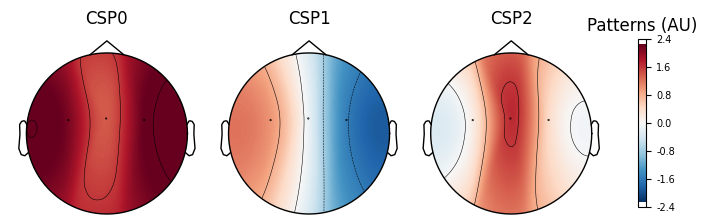

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
import numpy as np

# Extracting data from the epochs
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()
labels = epochs.events[:, -1] - min(epochs.events[:, -1])  # Adjust labels to start from 0

# Define a monte-carlo cross-validation generator (reduce variance)
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=3, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([("CSP", csp), ("LDA", lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=None)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1.0 - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))

# Fit CSP to the full dataset for visualization
csp.fit_transform(epochs_data, labels)

# Plot CSP patterns estimated on full data
csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5);



Computing rank from data with rank=None
    Using tolerance 2e-08 (2.2e-16 eps * 3 dim * 3e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-08 (2.2e-16 eps * 3 dim * 2.4e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-08 (2.2e-16 eps * 3 dim * 7.3e+07  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.4e-08 (2.2e-16 eps * 3 dim * 3.6e+07  max singular value)
    Estimated rank (mag

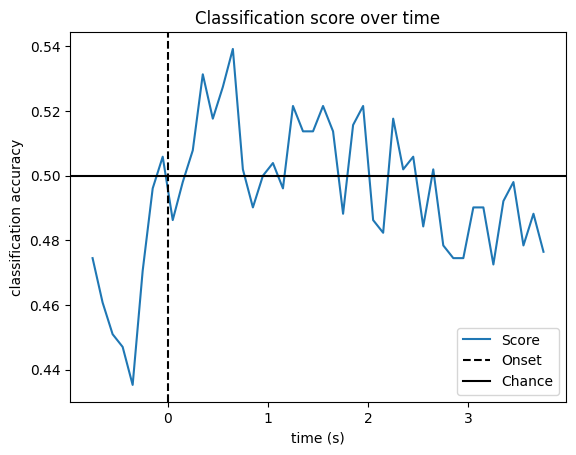

In [21]:
sfreq = raw.info["sfreq"]
w_length = int(sfreq * 0.5)  # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n : (n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.0) / sfreq + epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label="Score")
plt.axvline(0, linestyle="--", color="k", label="Onset")
plt.axhline(0.5, linestyle="-", color="k", label="Chance")
plt.xlabel("time (s)")
plt.ylabel("classification accuracy")
plt.title("Classification score over time")
plt.legend(loc="lower right")
plt.show()
